In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time

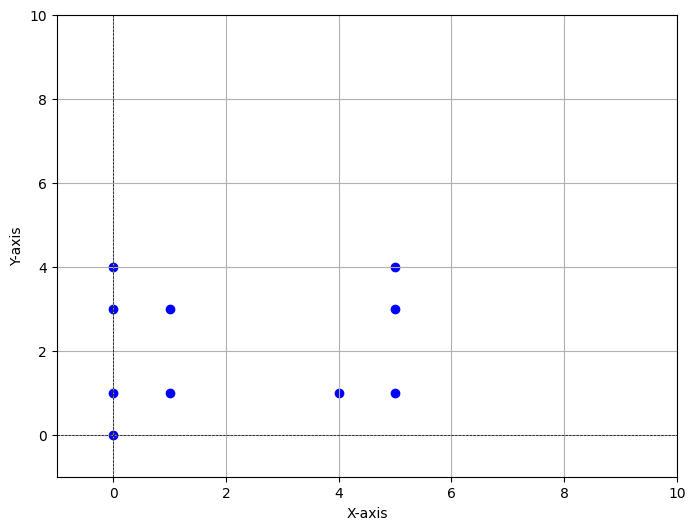

In [50]:
#Y = np.array([[0,0],[0,1],[10,0],[10,1],[5,5],[5,6]])
#Y = np.array([[0,9],[12,16],[12,2],[15,12],[5,5],[5,6]])
#Y = np.array([[0,0,0],[0,1,0],[0,0,1],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]])
Y = np.array([[0,0],[0,1],[1,1],[4,1],[5,1],[1,3],[0,3],[0,4],[5,3],[5,4]])


x_values = Y[:, 0]  
y_values = Y[:, 1]  

plt.figure(figsize=(8, 6))  
plt.scatter(x_values, y_values, color='blue', marker='o')

plt.xlabel('X-axis')  
plt.ylabel('Y-axis')
plt.grid(True) 
plt.xlim(-1, 10)  
plt.ylim(-1, 10)   

plt.axhline(0, color='black',linewidth=0.5, ls='--') 
plt.axvline(0, color='black',linewidth=0.5, ls='--')  
plt.show()

In [18]:
import itertools
import numpy as np
from sklearn.metrics import silhouette_score

def find_best_clustering(points, k):
    start=time.time()
    n = len(points) 
    best_score = -1 
    best_labels = None 
    
    for labels in itertools.product(range(k), repeat=n):
        if len(set(labels))<k:
            continue
        labels = np.array(labels)

        if len(set(labels)) > 1: 
            score = silhouette_score(points, labels)
            
            if score > best_score:
                best_score = score
                best_labels = labels
    end=time.time()
    print("Results for k =",k,"\nBest clustering: ",best_labels, " Best score: ",best_score," Runtime: ", end-start)
    return best_labels, best_score


In [24]:
def plot_clusters(points, labels):
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=plt.cm.Set1, s=100, edgecolor='k')
    plt.title("Clustered Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

Results for k= 2 
Best clustering:  [0 0 0 1 1 0 0 0 1 1]  Best score:  0.5614944612552737  Runtime:  0.6363098621368408


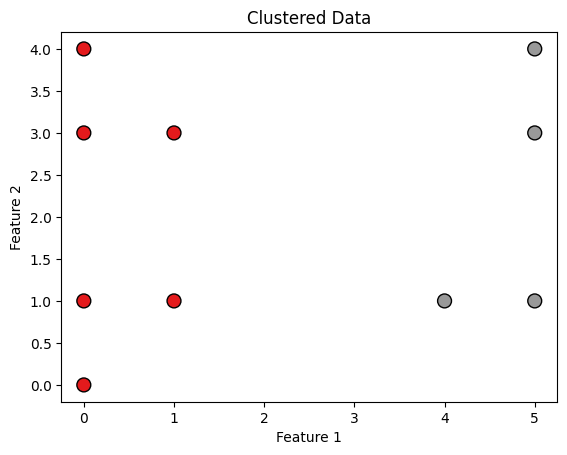

Results for k= 3 
Best clustering:  [0 0 0 1 1 2 2 2 1 1]  Best score:  0.5603396844863262  Runtime:  31.539668083190918


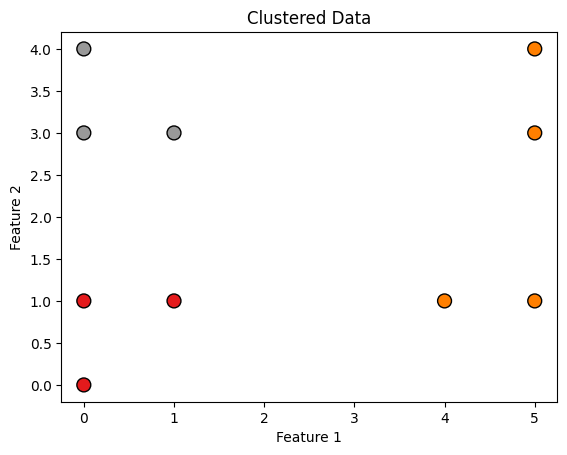

In [51]:

for k in [2,3]:
    lab,score=find_best_clustering(Y,k)
    plot_clusters(Y,lab)


Results for k= 4 
Best clustering:  [0 0 0 1 1 2 2 2 3 3]  Best score:  0.5911992596268625  Runtime:  477.0671169757843


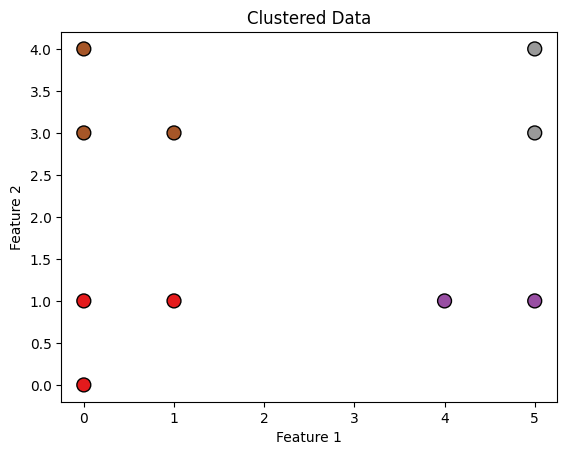

In [52]:
lab,score=find_best_clustering(Y,4)
plot_clusters(Y,lab)
